# 3. Video – acquisition and simple processing

In [14]:
import cv2
import matplotlib.pyplot as plt

### **a)** Display a video acquired from the webcam (in color) in one window and acquire and save a frame when the user presses the keyboard. Show the acquired frame in another window.

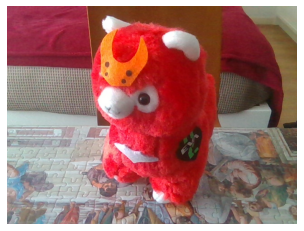

In [21]:
video = cv2.VideoCapture(0)

while True:
    ret, frame = video.read()
  
    cv2.imshow("Video capture", frame)
      
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
video.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### **b)** Display the video acquired from the webcam (in color) in one window and the result of the conversion of each frame to grayscale in another window.

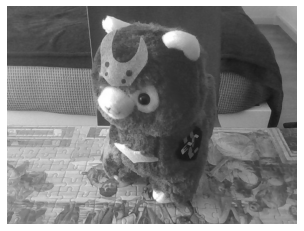

In [22]:
video = cv2.VideoCapture(0)

while True:
    ret, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  
    cv2.imshow("Video capture", frame)
    cv2.imshow("Grayscale", gray)
      
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
video.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### **c)** Modify the program developed in **b)** so that the resulting frames are in binary format (intensity of each pixel is $0$ or $255$). Use a threshold value of 128.

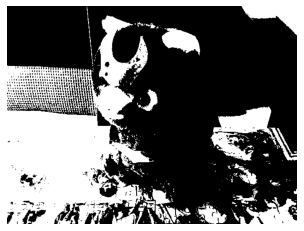

In [23]:
video = cv2.VideoCapture(0)

while True:
    ret, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    black_and_white = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)[1]
  
    cv2.imshow("Video capture", frame)
    cv2.imshow("Black and white", black_and_white)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
video.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(black_and_white, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### **d)** Implement a simple tracking algorithm for colored objects, using the following steps:

#### 1) take each frame of the video <br>2) convert from BGR to HSV color-space<br> 3) threshold the HSV image for a range of color values (creating a binary image)<br> 4) extract the objects of the selected range (use a bitwise `AND` operation, using as operands the original and the binary image)

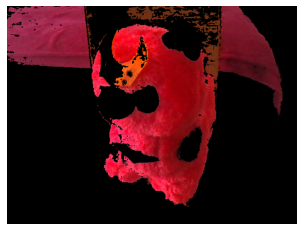

In [24]:
video = cv2.VideoCapture(0)

while True:
    # Taking each frame of the video
    ret, frame = video.read()

    # Convert from BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image for red values
    mask_1 = cv2.inRange(hsv, (170, 170, 20), (180, 255, 255))
    mask_2 = cv2.inRange(hsv, (0, 200, 20), (10, 255, 255))

    mask = mask_1 | mask_2
    result = cv2.bitwise_and(hsv, hsv, mask=mask)
    masked = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)

    cv2.imshow("Video capture", masked)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()